# Solve TSP problem using Genetic Algorithm

## Import libraries

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

## Model Gen and Chromosome

In [2]:
class City: # Gen in GA
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Route: # Chromosome in GA
    def __init__(self, cities : list):
        self.cities = cities
        self.fitness = 0
        self.distance = 0

    def calculate_distance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(0, len(self.cities)):
                fromCity = self.cities[i]
                toCity = None
                if i + 1 < len(self.cities):
                    toCity = self.cities[i + 1]
                else:
                    toCity = self.cities[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def calculate_fitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.calculate_distance())
        return self.fitness

## GA functions

In [4]:
def create_route(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initial_population(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(create_route(cityList))
    return population

In [6]:
def rank_routes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Route(population[i]).calculate_fitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [7]:
def selection(popRanked, eliteSize, population):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for _ in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break

    mating_pool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        mating_pool.append(population[index])
    return mating_pool

In [8]:
def PMX_crossover(parent1, parent2):
    n = len(parent1)
    index_low = random.randint(0, n-2)
    index_high = random.randint(index_low+1, n-1)
    # index_low = 3
    # index_high = 5
    offspring = parent1[:index_low] + parent2[index_low: index_high+1] + parent1[index_high+1:]
    relations = {}
    for i in range(index_low, index_high+1):
        relations[parent2[i]] = parent1[i]
    for i in range(index_low):
        while offspring[i] in relations:
            offspring[i] = relations[offspring[i]]
    for i in range(index_high+1, n):
        while offspring[i] in relations:
            offspring[i] = relations[offspring[i]]
    return offspring

PMX_crossover([1, 2, 3, 4, 5, 6, 7, 8], [3, 7, 5, 1, 6, 8, 2, 4])

[4, 2, 5, 1, 6, 8, 7, 3]

In [9]:
def CX_crossover(parent1: list, parent2: list):
    n = len(parent1)
    offspring = [-1 for _ in range(n)]
    parents = [parent1, parent2]
    for i in range(n):
        if offspring[i]==-1:
            random.shuffle(parents)
            offspring[i] = parents[0][i]
            j = parents[1].index(parents[0][i])
            while j!=i:
                offspring[j] = parents[0][j]
                j = parents[1].index(parents[0][j])
    return offspring

CX_crossover([1, 2, 3, 4, 5, 6, 7, 8], [2, 4, 6, 8, 7, 5, 3, 1])

[2, 4, 3, 8, 5, 6, 7, 1]

In [43]:
def OX1_crossover(parent1, parent2):
    n = len(parent1)
    index_low = random.randint(0, n-2)
    index_high = random.randint(index_low+1, n-1)
    offspring = [-1 for _ in range(n)]
    offspring[index_low: index_high+1] = parent1[index_low: index_high+1]
    j = (index_high + 1)%n
    if index_low == 0:
        k = index_high
    else:
        k = -1
    for i in range(n):
        if parent2[(i+j)%n] not in parent1[index_low: index_high+1]:
            if k == index_low - 1:
                k = index_high + 1
            else:
                k += 1
            offspring[k] = parent2[(i+j)%n]
    return offspring

In [53]:
def OX2_crossover(parent1, parent2):
    offspring = parent1
    n = len(parent1)
    num_random = random.randint(1, n)
    

OX2_crossover([1, 2, 3, 4, 5, 6, 7, 8], [])

7


[]

In [58]:
import random
def POS_crossover(parent1: list, parent2: list):
    number_of_positions_to_impose = int(random.random() * len(parent1))
    indices = [i for i in range(len(parent1))]
    randome_indices = sorted(random.sample(indices, number_of_positions_to_impose))
    offspring = []
    current_index_of_parent_1 = 0
    i = 0
    selected_cities = [parent2[y] for y in randome_indices]
    while len(offspring) < len(parent1):
        if i in randome_indices:
            offspring.append(parent2[i])
            i += 1
        else:
            if parent1[current_index_of_parent_1] not in selected_cities:
                offspring.append(parent1[current_index_of_parent_1])
                i += 1
            current_index_of_parent_1 += 1
    return offspring

print(POS_crossover([1,2,3,4,5,6,7,8],[2,4,6,8,7,5,3,1]))

[1, 4, 2, 8, 7, 5, 3, 6]


In [71]:
import random
def ER_crossover(parent1: list, parent2: list):
    def get_neighbors(parent, position):
        prev_city = position - 1 if position - 1 >= 0 else len(parent1) - 1
        next_city = position + 1 if position + 1 < len(parent1) else 0
        return [parent[prev_city], parent[next_city]]

    neighbor_list = {}
    for i, city in enumerate(parent1):
        index_in_parent2 = parent2.index(city)
        neighbor_list[city] = set(get_neighbors(parent1, i)+get_neighbors(parent2, index_in_parent2))

    unvisited = set(parent1)
    current_city = parent1[0]
    offspring = [current_city]
    unvisited.remove(current_city)
    while len(offspring) < len(parent1):
        neighbors = neighbor_list[current_city]
        if not len(neighbors):
            if not len(unvisited):
                return offspring
            current_city = unvisited.pop()
            offspring.append(current_city)
            continue
        min_neighbor = None
        min_neighbor_len = len(parent1)
        for neighbor in neighbors:
            neighbor_list[neighbor].remove(current_city)
            if len(neighbor_list[neighbor]) < min_neighbor_len:
                min_neighbor_len = len(neighbor_list[neighbor])
                min_neighbor = neighbor
        current_city = min_neighbor
        offspring.append(current_city)
        unvisited.remove(current_city)
    return offspring


print(ER_crossover([1,2,3,4,5,6],[2,4,3,1,5,6]))

[1, 3, 2, 4, 5, 6]


In [11]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [44]:
def breed_population(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = OX1_crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [91]:
def DM_mutate(individual, mutationRate):
    n = len(individual)
    if random.random() < mutationRate:
        index_low = random.randint(0, n-1)
        index_high = random.randint(index_low, n-1)
        subroute = individual[index_low:index_high+1]
        individual = individual[:index_low] + individual[index_high+1:]
        random_position = random.randint(0, len(individual))
        if random_position == 0:
            individual = subroute + individual
        elif random_position == len(individual):
            individual = individual + subroute
        else:
            individual = individual[:random_position] + subroute + individual[random_position:]
    return individual

DM_mutate([1, 2, 3, 4, 5, 6, 7, 8], 1)


[8, 1, 2, 3, 4, 5, 6, 7]

In [95]:
def ISM_mutate(individual: list, mutationRate: float):
    n = len(individual)
    if random.random() < mutationRate:
        index = random.randint(0, n-1)
        selected_city = individual[index]
        individual = individual[:index] + individual[index+1:]
        random_position = random.randint(0, n-1)
        individual.insert(random_position, selected_city)
    return individual

ISM_mutate([1, 2, 3, 4, 5, 6, 7, 8], 1)

[4, 1, 2, 3, 5, 6, 7, 8]

In [101]:
def IVM_mutate(individual: list, mutationRate: float):
    n = len(individual)
    if random.random() < mutationRate:
        index_low = random.randint(0, n-1)
        index_high = random.randint(index_low, n-1)
        subroute = individual[index_low:index_high+1]
        subroute.reverse()
        individual = individual[:index_low] + individual[index_high+1:]
        random_position = random.randint(0, len(individual))
        if random_position == 0:
            individual = subroute + individual
        elif random_position == len(individual):
            individual = individual + subroute
        else:
            individual = individual[:random_position] + subroute + individual[random_position:]
    return individual

IVM_mutate([1, 2, 3, 4, 5, 6, 7, 8], 1)

[1, 2, 3, 8, 7, 6, 5, 4]

In [13]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [14]:
def mutate_population(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [15]:
def next_generation(currentGen, eliteSize, mutationRate):
    popRanked = rank_routes(currentGen)
    mating_pool = selection(popRanked, eliteSize, currentGen)
    children = breed_population(mating_pool, eliteSize)
    nextGeneration = mutate_population(children, mutationRate)
    return nextGeneration

## Genetic algorithm main functions

In [16]:
def genetic_algorithm(population, population_size, eliteSize, mutationRate, generations):
    pop = initial_population(population_size, population)
    print("Initial distance: " + str(1 / rank_routes(pop)[0][1]))

    for i in range(0, generations):
        pop = next_generation(pop, eliteSize, mutationRate)

    print("Final distance: " + str(1 / rank_routes(pop)[0][1]))
    bestRouteIndex = rank_routes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [17]:
def genetic_algorithm_plot(population, popSize, eliteSize, mutationRate, generations):
    pop = initial_population(popSize, population)
    progress = []
    progress.append(1 / rank_routes(pop)[0][1])

    for i in range(0, generations):
        pop = next_generation(pop, eliteSize, mutationRate)
        progress.append(1 / rank_routes(pop)[0][1])

    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

## Read dataset or generate random data

In [18]:
cityList = []
with open('dataset.txt', 'r') as f:
    for line in f:
        id, x, y = line[:-1].split(' ')
        cityList.append(City(float(x), float(y)))

In [16]:
cityList = []

for position in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

## Run alogrithm

In [45]:
genetic_algorithm(population=cityList, population_size=100, eliteSize=20, mutationRate=0.01, generations=200)

Initial distance: 23611.234313007113
Final distance: 12819.408610362363


[(11133.3333,42885.8333),
 (11511.3889,42106.3889),
 (11438.3333,42057.2222),
 (11715.8333,41836.1111),
 (11003.6111,42102.5),
 (11108.6111,42373.8889),
 (11751.1111,42814.4444),
 (12386.6667,43334.7222),
 (12286.9444,43355.5556),
 (12363.3333,43189.1667),
 (12355.8333,43156.3889),
 (12645.0,42973.3333),
 (12300.0,42433.3333),
 (12149.4444,42477.5),
 (12058.3333,42195.5556),
 (11846.9444,42660.5556),
 (11822.7778,42673.6111),
 (11973.0556,43026.1111),
 (12421.6667,42895.5556),
 (12372.7778,42711.3889),
 (11461.1111,43252.7778),
 (11569.4444,43136.6667),
 (11785.2778,42884.4444),
 (11485.5556,43187.2222),
 (11310.2778,42929.4444),
 (11297.5,42853.3333),
 (11690.5556,42686.6667),
 (11770.2778,42651.9444),
 (11522.2222,42841.9444),
 (11423.8889,43000.2778),
 (11963.0556,43290.5556),
 (11595.0,43148.0556),
 (11600.0,43150.0),
 (11583.3333,43150.0),
 (11416.6667,42983.3333),
 (11503.0556,42855.2778),
 (11183.3333,42933.3333),
 (11155.8333,42712.5)]

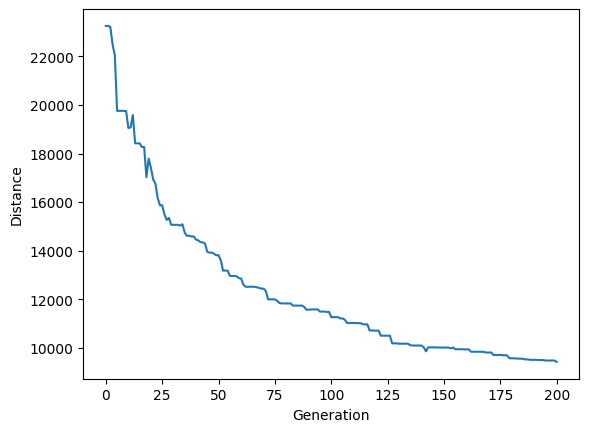

In [23]:
genetic_algorithm_plot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=200)